## Data 620 Project 2
### Lin Li and Tony Mai
Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter
import networkx.algorithms.bipartite as bipartite
from networkx.algorithms import community #This is part of networkx, for community detection
import pandas as pd
import csv

### Plant - pollinator network

The Web of Life project is developed at Jordi Bascompte's lab (www.bascompte.net), a research group focused on the structure and dynamics of ecological networks. It is supported by an European Research Council's Advanced Grant.

In [2]:
# load dataset
df = pd.read_csv("M_PL_021.csv")

# convert adjacency matrix to source - target format
df.columns.values[0] = 'Pollinator'
result = pd.melt(df,id_vars=['Pollinator'])
filtered = result[result['value'] == 1].rename(columns={'Pollinator': 'source', 'variable': 'target'})

# get network info
G = nx.from_pandas_edgelist(filtered)
print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 768
Number of edges: 1193
Average degree:   3.1068


In [3]:
# check if network is 2-mode
nx.is_bipartite(G)

True

In [4]:
plants = list(filtered.target.unique())
pollinators = list(filtered.source.unique())

In [5]:
# project bipartite graph onto plants nodes
W = bipartite.projected_graph(G, plants)
W = bipartite.weighted_projected_graph(G, plants)

# project bipartite graph onto pollinators nodes
C = bipartite.projected_graph(G, pollinators)
C = bipartite.weighted_projected_graph(G, pollinators)

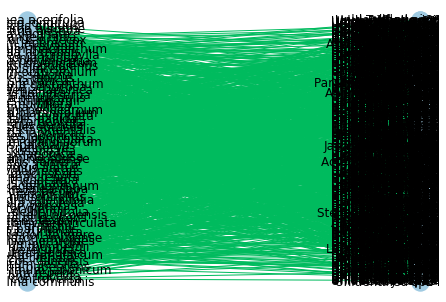

In [6]:
sub_data = filtered

edges = [tuple(x) for x in sub_data[['source','target']].values.tolist()]
B = nx.Graph()
B.add_nodes_from(sub_data['source'].unique(), bipartite=0)
B.add_nodes_from(sub_data['target'].unique(), bipartite=1)
B.add_edges_from(edges, label='value')

# Now instead of spring_layout, use bipartite_layout

# First specify the nodes you want on left or top
left_or_top = sub_data['source'].unique()

# Then create a bipartite layout
pos = nx.bipartite_layout(B, left_or_top)

# Pass that layout to nx.draw
nx.draw(B,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,
     edge_cmap=plt.cm.Blues,with_labels=True)

In [7]:
#calculate degree centrality
degree_centrality_C = nx.degree_centrality(C)
degree_centrality_W = nx.degree_centrality(W)

In [8]:
# Degree Centrality for plants 
sorted_degree_centrality_C = sorted(degree_centrality_C.items(), key=itemgetter(1), reverse=True)
df_centrality_C = pd.DataFrame(sorted_degree_centrality_C, columns =['Name', 'Degree Centrality']) 
print(df_centrality_C[:10])

# Degree Centrality for pollinators
sorted_degree_centrality_W = sorted(degree_centrality_W.items(), key=itemgetter(1), reverse=True)
df_centrality_W = pd.DataFrame(sorted_degree_centrality_W, columns =['Name', 'Degree Centrality']) 
print(df_centrality_W[:10])

                    Name  Degree Centrality
0      Weigela hortensis           0.800000
1   Hydrangea paniculata           0.722222
2   Cirsium kagamontanum           0.722222
3  Hydrangea macrophylla           0.700000
4        Deutzia crenata           0.677778
5   Rabdosia trichocarpa           0.666667
6  Persicaria thunbergii           0.644444
7  Corydalis lineariloba           0.622222
8     Geranium nepalense           0.622222
9          Prunus incisa           0.577778
                         Name  Degree Centrality
0         Eristalis cerealis            0.714497
1       Lasioglossum apristum           0.665680
2  Mordellistena sp1 M_PL_021           0.649408
3   Unidentified sp1 M_PL_021           0.631657
4    Sphaerophoria menthastri           0.556213
5   Lasioglossum transpositum           0.541420
6        Graphomyia maculata            0.474852
7         Melanostoma scalare           0.470414
8   Unidentified sp2 M_PL_021           0.464497
9        Episyrphus baltea

In [9]:
# get betweenness values 
betweenness_dict_C = nx.betweenness_centrality(C)
betweenness_dict_W = nx.betweenness_centrality(W) 

In [10]:
# betweenness centrality for plant network
sorted_betweenness_C = sorted(betweenness_dict_C.items(), key=itemgetter(1), reverse=True)
df_btw_C = pd.DataFrame(sorted_betweenness_C, columns =['Name', 'Betweenness Centrality']) 
print(df_btw_C[:10])

# betweenness centrality for pollinator network
sorted_betweenness_W = sorted(betweenness_dict_W.items(), key=itemgetter(1), reverse=True)
df_btw_W = pd.DataFrame(sorted_betweenness_W, columns =['Name', 'Betweenness Centrality']) 
print(df_btw_W[:10])

                    Name  Betweenness Centrality
0      Weigela hortensis                0.047831
1  Corydalis lineariloba                0.044183
2        Deutzia crenata                0.041016
3     Angelica pubescens                0.040111
4  Persicaria thunbergii                0.036556
5   Rabdosia trichocarpa                0.036187
6   Hydrangea paniculata                0.032878
7      Anthriscus aemula                0.032872
8          Prunus incisa                0.032303
9  Hydrangea macrophylla                0.031719
                         Name  Betweenness Centrality
0         Eristalis cerealis                 0.088091
1      Ceratina megastigmata                 0.052005
2       Lasioglossum apristum                0.050596
3    Sphaerophoria menthastri                0.048904
4  Mordellistena sp1 M_PL_021                0.042368
5   Unidentified sp1 M_PL_021                0.036884
6   Unidentified sp2 M_PL_021                0.027123
7   Lasioglossum transpositum

In [11]:
# get eigenvector centrality values 
eigen_dict_C = nx.eigenvector_centrality(C)
eigen_dict_W = nx.eigenvector_centrality(W)

In [12]:
# eigenvector values for plant network
sorted_eigen_C = sorted(eigen_dict_C.items(), key=itemgetter(1), reverse=True)
df_eigen_C = pd.DataFrame(sorted_eigen_C, columns =['Name', 'Eigenvector Centrality']) 

print(df_eigen_C[:10])

# eigenvector values for pollinator network
sorted_eigen_W = sorted(eigen_dict_W.items(), key=itemgetter(1), reverse=True)
df_eigen_W = pd.DataFrame(sorted_eigen_W, columns =['Name', 'Eigenvector Centrality']) 
#chart_btw_W = df_btw_W.plot.bar(x='Name', y='Betweenness Centrality', rot=90)
print(df_eigen_W[:10])

                    Name  Eigenvector Centrality
0      Weigela hortensis                0.197864
1   Cirsium kagamontanum                0.187956
2   Hydrangea paniculata                0.185056
3  Hydrangea macrophylla                0.178568
4        Deutzia crenata                0.171350
5     Geranium nepalense                0.171236
6   Rabdosia trichocarpa                0.171183
7  Persicaria thunbergii                0.168703
8  Corydalis lineariloba                0.158710
9     Astilbe thunbergii                0.152914
                         Name  Eigenvector Centrality
0         Eristalis cerealis                 0.081857
1       Lasioglossum apristum                0.081584
2  Mordellistena sp1 M_PL_021                0.081549
3   Unidentified sp1 M_PL_021                0.081346
4   Lasioglossum transpositum                0.079251
5    Sphaerophoria menthastri                0.078136
6           Andrena hikosana                 0.077487
7   Unidentified sp2 M_PL_021